# Frecuencia de CDS por cromosoma

Script dirigido a calcular la frecuencia de segmentos con estado E9 y filtrados solapantes con protein-coding genes (CDS).

In [6]:
# Importe de los módulos necesarios
import csv
import matplotlib.pyplot as plt

# Se carga el archivo que contiene los cromosomas con la cantidad de segmentos que presentan CDS:
#    Claves -> Cromosomas
#    Valores -> Número de segmentos que solapan con CDS para cada cromosoma
reader = csv
with open('./ARCHIVOS_PARA_GRAFICA/Porcentajes_CDS_cromosoma.csv', mode='r') as f:
    reader = csv.reader(f)
    diccionario_porcentaje_cds = {rows[0]:rows[1] for rows in reader}

In [7]:
# Sustitución de la entrada '-nan', que indicaría la ausencia de segmentos en ese cromosoma, por 0.
for key, value in diccionario_porcentaje_cds.items():
            if value == "-nan":
                    diccionario_porcentaje_cds[key] = "0"

In [8]:
# Cambio de los valores del diccionario strings a floats.
for key in diccionario_porcentaje_cds:
    diccionario_porcentaje_cds[key] = float(diccionario_porcentaje_cds[key])

In [9]:
# Asignación de las claves y los valores a dos listas
lista_claves = list(diccionario_porcentaje_cds.keys())
lista_valores = list(diccionario_porcentaje_cds.values())

# Cálculo de la media de porcentaje de todos los cromosomas 
# Se omite el chrM ya que no existen segmentos con estado E9 que solapen con CDS en el cromosoma mitocondrial
Media = sum(lista_valores[:-1])/len(lista_valores[:-1])
print(Media)

# Adición del valor de la media a la lista de claves y de valores
lista_claves.append("Media")
lista_valores.append(Media)

0.03417948260869565


En la siguiente celda se ha representado el porcentaje de segmentos con estado E9 que solapan con regiones codificantes, en cada cromosoma. 

Se observa la ausencia de CDS en el cromosoma mitocondrial, no porque no existan genes codificantes en este cromosoma, sino porque no están asociados a las características del estado E9 (es decir, no se encuentran asociados a CTCF). 
De hecho, el cromosoma mitocondrial no presenta ninguna de las marcas epigenómicas que han sido analizadas con ChromHMM y, por tanto, el estado principal de dicho cromosoma es el E8. Por este motivo, al calcular la media de segmentos solapantes con genes codificantes, se ha excluido al cromosoma mitocondrial.

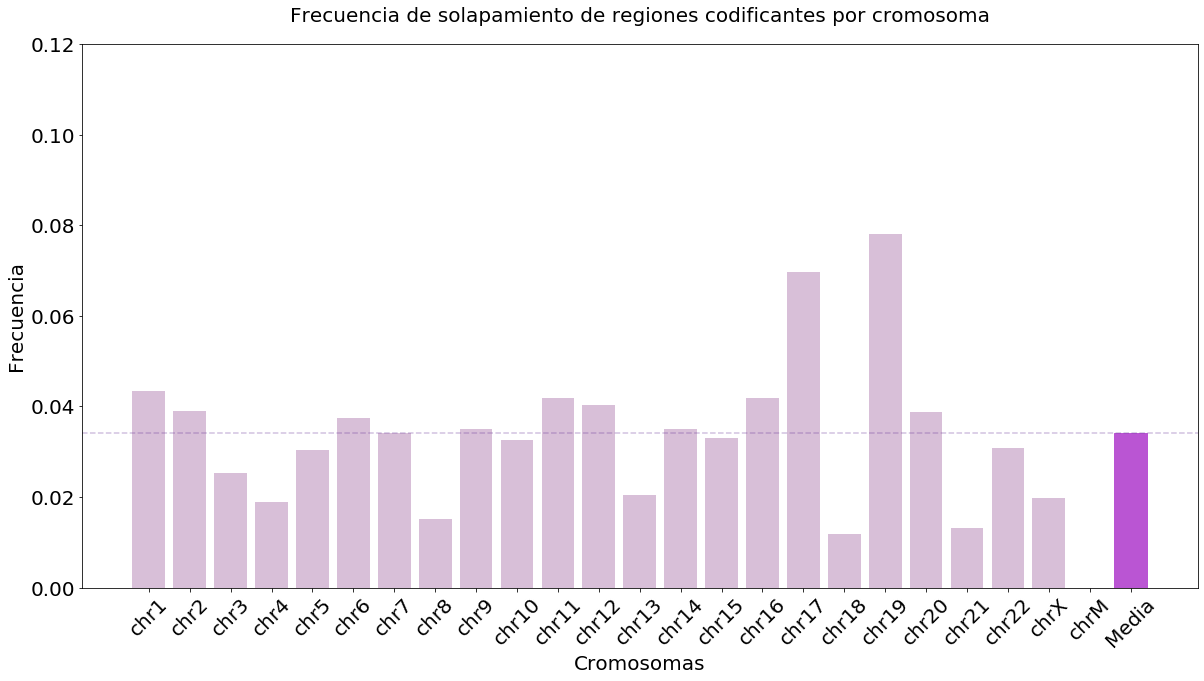

In [30]:
# Generación de la gráfica de visualización
plt.figure(figsize=(20,10))
plt.xticks(rotation=45, ha="center")
plot_cds = plt.bar(lista_claves,lista_valores, color = 'thistle')

# Incremento de tamaño de las etiquetas de los ejes OX y OY.
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

# Adición de un color diferente al valor de la media
plot_cds[-1].set_color('mediumorchid')

# Adición de una línea horizontal a la altura de la media
plt.axhline(Media, alpha = 0.3, linestyle='--', color = 'rebeccapurple')

# Adición de títulos y etiquetas a los ejes
plt.ylim(ymax = 0.12, ymin = 0)
plt.ylabel('Frecuencia', fontsize = 20)
plt.xlabel('Cromosomas', fontsize = 20)
plt.title('Frecuencia de solapamiento de regiones codificantes por cromosoma', fontsize = 20, y = 1.03)

plt.show()